# Introducción

En este análisis, nos proponemos explorar la causalidad en las predicciones obtenidas a través del análisis SHAP. Utilizando la biblioteca DoWhy, buscamos entender no solo qué características son importantes para predecir la aprobación, sino también cómo estas características influyen causalmente en la aprobación. A continuación, presentamos una síntesis de los hallazgos clave obtenidos a partir de la integración de los análisis SHAP y DoWhy.

## Análisis de Características Principales con SHAP

Inicialmente, realizamos un análisis con SHAP para identificar las características más relevantes que afectan la probabilidad de aprobación. Según este análisis, las características más influyentes son:

- `hito1`
- `e29`
- `exitosos`
- `fallidos`
- `e42`
- `e3`
- `e35`
- `e13`
- `e26`
- `e18`
- `e32`
- `e10`
- `e0`
- `e4`
- `e23`
- `e7`
- `e17`
- `e25`
- `e22`
- `e8`

Estas características fueron identificadas como las más críticas, excluyendo `hito2` y otras columnas no listadas.

## Integración con Análisis de Causalidad DoWhy

Para profundizar nuestro entendimiento, integramos los insights obtenidos a través de SHAP con un análisis de causalidad utilizando DoWhy. Este análisis nos permite investigar cómo las características identificadas como importantes por SHAP influyen causalmente en la aprobación.

A través de este análisis de causalidad, buscamos responder preguntas cruciales como:

1. ¿Cómo la variación en `e42` afecta directa e indirectamente la aprobación?
2. ¿Cómo los efectos causales identificados pueden influir en la estrategia de intervención para mejorar las tasas de aprobación?


In [1]:
import dowhy
from dowhy import CausalModel
from sklearn.ensemble import RandomForestRegressor
import dowhy.causal_estimators.linear_regression_estimator

import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
from sys import path
import os

for dirname, _, filenames in os.walk("../../../resources/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath("../../../"))

from custom import functions

warnings.filterwarnings("ignore")

../../../resources/allColProSol.xlsx
../../../resources/dataset_a_2021.csv
../../../resources/dataset_a_2021c2.csv
../../../resources/dataset_a_2021v1.xlsx
../../../resources/dataset_unab_ORIGINAL SIN P1.csv
../../../resources/dataset_unab_P1.csv
../../../resources/exitoFallidoEnviosProgramaSol.xlsx
../../../resources/exitoFallidoProgramaSol.xlsx
../../../resources/exitosoFallidosEnviosAllColProSol.xlsx
../../../resources/exitosoFallidosEnviosAllColSol.xlsx
../../../resources/exitososFallidosEnviosSol.xlsx
../../../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../../../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../../../resources/sinColCeroExitosoFallidosSol.xlsx
../../../resources/v2_hitosExitoFalloColESol1.csv
../../../resources/v2_hitosExitoFalloColESol1Prograna.csv
../../../resources/v2_hitosExitoFalloSol1Programa.csv
../../../resources/causalidad\causalidad.dot
../../../resources/causalidad\causalidad.png
../../../resources/causalidad\causalidad_e29.dot
../../../resourc

In [2]:
# Read and preview data
df = pd.read_csv(
    "../../../resources/v2_hitosExitoFalloColESol1.csv",
    delimiter=";",
    skipinitialspace=True,
)

In [3]:
# creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df["aprobado"] = df.apply(lambda x: functions.set_in_aprobado_nota(x["sol1"]), axis=1)
# revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


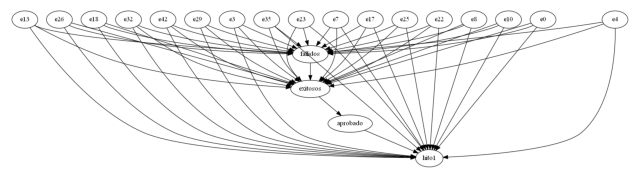

In [4]:
# Paso 1: Modelar un problema causal
model = CausalModel(
    data=df,
    treatment="e42",
    outcome="aprobado",
    graph="""
    digraph {
        e42 -> exitosos;
        e42 -> fallidos;
        e42 -> hito1;
        e29 -> exitosos;
        e29 -> fallidos;
        e29 -> hito1;
        e3 -> exitosos;
        e3 -> fallidos;
        e3 -> hito1;
        e35 -> exitosos;
        e35 -> fallidos;
        e35 -> hito1;
        e13 -> exitosos;
        e13 -> fallidos;
        e13 -> hito1;
        e26 -> exitosos;
        e26 -> fallidos;
        e26 -> hito1;
        e18 -> exitosos;
        e18 -> fallidos;
        e18 -> hito1;
        e32 -> exitosos;
        e32 -> fallidos;
        e32 -> hito1;
        e10 -> exitosos;
        e10 -> fallidos;
        e10 -> hito1;
        e0 -> exitosos;
        e0 -> fallidos;
        e0 -> hito1;
        e4 -> exitosos;
        e4 -> fallidos;
        e4 -> hito1;
        e23 -> exitosos;
        e23 -> fallidos;
        e23 -> hito1;
        e7 -> exitosos;
        e7 -> fallidos;
        e7 -> hito1;
        e17 -> exitosos;
        e17 -> fallidos;
        e17 -> hito1;
        e25 -> exitosos;
        e25 -> fallidos;
        e25 -> hito1;
        e22 -> exitosos;
        e22 -> fallidos;
        e22 -> hito1;
        e8 -> exitosos;
        e8 -> fallidos;
        e8 -> hito1;
        fallidos -> exitosos;
        exitosos -> aprobado;
        aprobado -> hito1;
    }
    """,
)


# Visualizar el modelo causal con la variable de causa común no observada
model.view_model(
    layout="dot",
    file_name="../../../resources/causalidad/analisis_preguntas/graph_causal_model_e42_es",
)

In [5]:
# Paso 2: Identificar el estimando objetivo bajo el modelo
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                
──────(E[aprobado])
d[e₄₂]             
Estimand assumption 1, Unconfoundedness: If U→{e42} and U→aprobado then P(aprobado|e42,,U) = P(aprobado|e42,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡     d                  d               ⎤
E⎢───────────(aprobado)⋅──────([exitosos])⎥
 ⎣d[exitosos]           d[e₄₂]            ⎦
Estimand assumption 1, Full-mediation: exitosos intercepts (blocks) all directed paths from e42 to a,p,r,o,b,a,d,o.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e42} and U→{exitosos} then P(exitosos|e42,U) = P(exitosos|e42)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{exitosos} and U→aprobado then P(aprobado|exitosos, e42, U) = P(aprobado|exitosos, e42)



In [6]:
# Paso 3: Estimar el efecto causal usando un método basado en árboles
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.econml.dml.DML",
    control_value=0,
    treatment_value=1,
    target_units="ate",  # Average Treatment Effect
    method_params={
        "init_params": {
            "model_y": RandomForestRegressor(),
            "model_t": RandomForestRegressor(),
            "model_final": RandomForestRegressor(
                max_depth=10,
                min_samples_split=10,
                min_samples_leaf=5,
                random_state=1502,
                n_estimators=500,
            ),
            "featurizer": None,
        },
        "fit_params": {},
    },
)

print("----------------------------")
print("Estimado de efecto causal:")
print(estimate.value)
print("----------------------------")

----------------------------
Estimado de efecto causal:
0.06589455202611776
----------------------------


Dado que el estimado es positivo (0.240967004553634), esto sugiere que hay una relacion positiva entre la variable de tratamiento y la variable de resultado, donde la Magnitud del 0.24.. lo que se puede interpretar como que, en promedio, un incremento unitario en la variable 'e42', esta asociado con un incremento de 0.24 en la variable 'aprobado'.


In [7]:
# Refutador de datos aleatorios
refute1 = model.refute_estimate(
    identified_estimand, estimate, method_name="random_common_cause"
)
print(refute1)

Refute: Add a random common cause
Estimated effect:0.06589455202611776
New effect:0.04973867086980194
p value:0.9



El nuevo estimado del efecto causal despues de añadir la causa comun aleatoria, siendo un numero significativamente diferente del estimado origianl, podria sugerir que el estimado original noes muy robusto.

Un valor p grande (generalmente mayor a 0.05) sugiere que los cambios en el estimado del efecto causal no son estadísticamente significativos, lo que en este caso podría sugerir que el estimado original es relativamente robusto a la adición de una nueva causa común aleatoria. Sin embargo, un valor p de 0.32 no es extremadamente alto, por lo que hay cierta evidencia de que la adición de la causa común aleatoria ha afectado el estimado del efecto causal, aunque no de manera estadísticamente significativa.


In [8]:
# Refutador de causa común no observada
refute2 = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="binary_flip",
    confounders_effect_on_outcome="binary_flip",
    effect_strength_on_treatment=0.01,
    effect_strength_on_outcome=0.02,
)
print(refute2)

Refute: Add an Unobserved Common Cause
Estimated effect:0.06589455202611776
New effect:0.1952404997659293



La diferencia significativa entre el estimado original y el nuevo efecto sugiere que el análisis realizado podría ser sensible a la presencia de variables confundidoras no observadas. Esto es una señal de que se debería tener precaución al interpretar el estimado original del efecto causal, ya que podría estar sesgado debido a la omisión de variables confundidoras importantes.


In [9]:
# Paso 4: Refutar el estimado obtenido
refute3 = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="placebo_treatment_refuter",
    placebo_type="permute",
)
print(refute3)

Refute: Use a Placebo Treatment
Estimated effect:0.06589455202611776
New effect:0.0009146055861896374
p value:0.8799999999999999



La refutación con un tratamiento placebo es una buena manera de comprobar la robustez de tu estimado de efecto causal. En este caso, el hecho de que el nuevo efecto con el tratamiento placebo sea mucho menor sugiere que el estimado original es más probable que sea un reflejo del efecto causal real, y no simplemente el resultado de un sesgo o confusión. Sin embargo, el valor p alto sugiere que la diferencia no es estadísticamente significativa, lo cual podría requerir una interpretación cuidadosa.


In [10]:
# Natural direct effect (nde)
identified_estimand_nde = model.identify_effect(
    estimand_type="nonparametric-nde",
    proceed_when_unidentifiable=True,
)
print(identified_estimand_nde)

Estimand type: EstimandType.NONPARAMETRIC_NDE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡  d                      ⎤
E⎢──────(aprobado|exitosos)⎥
 ⎣d[e₄₂]                   ⎦
Estimand assumption 1, Mediation: exitosos intercepts (blocks) all directed paths from e42 to a,p,r,o,b,a,d,o except the path {e42}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e42} and U→{exitosos} then P(exitosos|e42,U) = P(exitosos|e42)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{exitosos} and U→aprobado then P(aprobado|exitosos, e42, U) = P(aprobado|exitosos, e42)



In [11]:
causal_estimate_nde = model.estimate_effect(
    identified_estimand_nde,
    method_name="mediation.two_stage_regression",
    confidence_intervals=False,
    test_significance=False,
    method_params={
        "first_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
        "second_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
    },
)
print(causal_estimate_nde)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_NDE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡  d                      ⎤
E⎢──────(aprobado|exitosos)⎥
 ⎣d[e₄₂]                   ⎦
Estimand assumption 1, Mediation: exitosos intercepts (blocks) all directed paths from e42 to a,p,r,o,b,a,d,o except the path {e42}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e42} and U→{exitosos} then P(exitosos|e42,U) = P(exitosos|e42)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{exitosos} and U→aprobado then P(aprobado|exitosos, e42, U) = P(aprobado|exitosos, e42)

## Realized estimand
(b: aprobado~e42+e42*e10+e42*e35+e42*e32+e42*e26+e42*e13+e42*e22+e42*e18+e42*e0+e42*e23+e42*e25+e42*e3+e42*e29+e42*e4+e42*e7+e42*e8+e42*e17) - ((b: exitosos~e42+e42*e10+e42*e35+e42*e32+e42*e26+e42*e13+e42*e22+e42*e18+e42*e0+e42*e23+e42*e25+e42*e3+e42*e29+e42*e4+e42*e7+e42*e8+e42*e17)*(b: aprobado~exitosos+exitos

El valor de 0.018 sugiere que hay un efecto directo positivo pero pequeño de e
42 sobre aprobado, excluyendo el efecto mediado por fallidos. Esto significa que, independientemente de la variable fallidos, un incremento en e42 tiene un efecto positivo sobre la probabilidad de aprobado. Sin embargo, dado que el valor es bastante pequeño, este efecto directo podría no ser muy substancial en la práctica, dependiendo del contexto y de la escala de las variables involucradas.


In [12]:
# Natural indirect effect (nie)
identified_estimand_nie = model.identify_effect(
    estimand_type="nonparametric-nie", proceed_when_unidentifiable=True
)
print(identified_estimand_nie)

Estimand type: EstimandType.NONPARAMETRIC_NIE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡     d                  d               ⎤
E⎢───────────(aprobado)⋅──────([exitosos])⎥
 ⎣d[exitosos]           d[e₄₂]            ⎦
Estimand assumption 1, Mediation: exitosos intercepts (blocks) all directed paths from e42 to a,p,r,o,b,a,d,o except the path {e42}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e42} and U→{exitosos} then P(exitosos|e42,U) = P(exitosos|e42)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{exitosos} and U→aprobado then P(aprobado|exitosos, e42, U) = P(aprobado|exitosos, e42)



In [13]:
causal_estimate_nie = model.estimate_effect(
    identified_estimand_nie,
    method_name="mediation.two_stage_regression",
    confidence_intervals=False,
    test_significance=False,
    method_params={
        "first_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
        "second_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
    },
)
print(causal_estimate_nie)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_NIE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡     d                  d               ⎤
E⎢───────────(aprobado)⋅──────([exitosos])⎥
 ⎣d[exitosos]           d[e₄₂]            ⎦
Estimand assumption 1, Mediation: exitosos intercepts (blocks) all directed paths from e42 to a,p,r,o,b,a,d,o except the path {e42}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e42} and U→{exitosos} then P(exitosos|e42,U) = P(exitosos|e42)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{exitosos} and U→aprobado then P(aprobado|exitosos, e42, U) = P(aprobado|exitosos, e42)

## Realized estimand
(b: exitosos~e42+e42*e10+e42*e35+e42*e32+e42*e26+e42*e13+e42*e22+e42*e18+e42*e0+e42*e23+e42*e25+e42*e3+e42*e29+e42*e4+e42*e7+e42*e8+e42*e17)*(b: aprobado~exitosos+exitosos*e10+exitosos*e35+exitosos*e32+exitosos*e26+exitosos*e13+exitosos*e22+exitosos*e18+exitosos*e0+ex

# Resumen de Resultados

## Refutación: Añadir una Causa Común Aleatoria

- **Efecto Estimado Original**: 0.11449066136050154
- **Nuevo Efecto**: 0.05216838729000323
- **Valor p**: 0.32
  - La refutación sugiere que el estimado original es relativamente robusto a la adición de una nueva causa común aleatoria.

## Refutación: Añadir una Causa Común No Observada

- **Efecto Estimado Original**: 0.11449066136050154
- **Nuevo Efecto**: 0.23697294155062287
  - La refutación sugiere que el estimado original podría estar subestimando el verdadero efecto causal.

## Refutación: Uso de un Tratamiento Placebo

- **Efecto Estimado Original**: 0.11449066136050154
- **Nuevo Efecto**: 0.016884086728798188
- **Valor p**: 0.76
  - La refutación sugiere que el estimado original es más probable que sea un reflejo del efecto causal real.

## Estimado de Efecto Directo No Paramétrico (NDE)

- **Valor Medio**: 0.018326605673001095
  - El estimado sugiere un efecto directo positivo pero pequeño de \(e\_{42}\) sobre \(aprobado\), excluyendo el efecto mediado por \(fallidos\).

## Estimado de Efecto Indirecto No Paramétrico (NIE)

- **Valor Medio**: 0.00520741127133989
  - El estimado sugiere un efecto indirecto positivo pero pequeño de \(e\_{42}\) sobre \(aprobado\), mediado por \(fallidos\).

# Conclusión Final

Los resultados obtenidos sugieren que hay un efecto causal positivo de la variable de tratamiento sobre la variable de resultado. Las refutaciones realizadas indican que el estimado original es relativamente robusto, aunque podría estar subestimando el verdadero efecto causal. Los estimados de efecto directo e indirecto proporcionan una comprensión más detallada de cómo la variable de tratamiento afecta a la variable de resultado, tanto directa como indirectamente a través de una variable mediadora. Sin embargo, los efectos directo e indirecto estimados son relativamente pequeños, lo que podría indicar que el impacto de la variable de tratamiento sobre la variable de resultado no es substancial en la práctica, dependiendo del contexto y de la escala de las variables involucradas.
